# Bibliotecas e *drives*

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, timedelta
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics.regression import r2_score

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.regression module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


*acessando minha pasta do Gdrive onde estão as informações que preciso*

In [0]:
#from google.colab import drive # Essa célula monta o drive, vai exigir autenticação para ler e manipular os arquivos
#drive.mount('/content/gdrive') # autenticação, copiar a chave de acesso que será disponibilizada

### optei por não usar, pois o google disponibilizou uma função para isso

In [3]:
#acessando a pasta
%cd /content/drive/My\ Drive/Colab\ Notebooks/covid19

/content/drive/My Drive/Colab Notebooks/covid19


In [4]:
!ls #verificando o conteudo da pasta

2014_us_cities.csv	    full_data_20200320.csv  full_data_20200326.csv
brasil_20200324.csv	    full_data_20200321.csv  teste.png
covid19Brazil-script.ipynb  full_data_20200322.csv
covid19-script.ipynb	    full_data_20200323.csv


# Carregando o banco de dados

In [16]:
full_df = pd.read_csv('full_data_20200326.csv')
full_df.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2019-12-31,Afghanistan,0,0,0,0
1,2020-01-01,Afghanistan,0,0,0,0
2,2020-01-02,Afghanistan,0,0,0,0
3,2020-01-03,Afghanistan,0,0,0,0
4,2020-01-04,Afghanistan,0,0,0,0


In [0]:
brazil_df = full_df[full_df['location']=='Brazil']
china_df = full_df[full_df['location']=='China']
italy_df = full_df[full_df['location']=='Italy']
iran_df = full_df[full_df['location']=='Iran']
spain_df = full_df[full_df['location'] == 'Spain']
canada_df = full_df[full_df['location'] == 'Canada']
usa_df = full_df[full_df['location']=='United States']
uk_df = full_df[full_df['location']=='United Kingdom']
france_df = full_df[full_df['location'] == 'France']

In [19]:
france_df.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths
2117,2019-12-31,France,0,0,0,0
2118,2020-01-01,France,0,0,0,0
2119,2020-01-02,France,0,0,0,0
2120,2020-01-03,France,0,0,0,0
2121,2020-01-04,France,0,0,0,0


In [0]:
brazil_df = brazil_df[brazil_df['total_cases'] != 0].reset_index()
china_df = china_df[china_df['total_cases'] != 0].reset_index()
italy_df = italy_df[italy_df['total_cases'] != 0].reset_index()
usa_df = usa_df[usa_df['total_cases'] != 0].reset_index()
iran_df = iran_df[iran_df['total_cases'] != 0].reset_index()
spain_df = spain_df[spain_df['total_cases'] != 0].reset_index()
canada_df = canada_df[canada_df['total_cases'] != 0].reset_index()
uk_df = uk_df[uk_df['total_cases'] != 0].reset_index()
france_df = france_df[france_df['total_cases'] != 0].reset_index()

In [23]:
france_df.head()

,index,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2142,2020-01-25,France,3,0,3,0
1,2143,2020-01-26,France,0,0,3,0
2,2144,2020-01-27,France,0,0,3,0
3,2145,2020-01-28,France,0,0,3,0
4,2146,2020-01-29,France,1,0,4,0


# Plotando

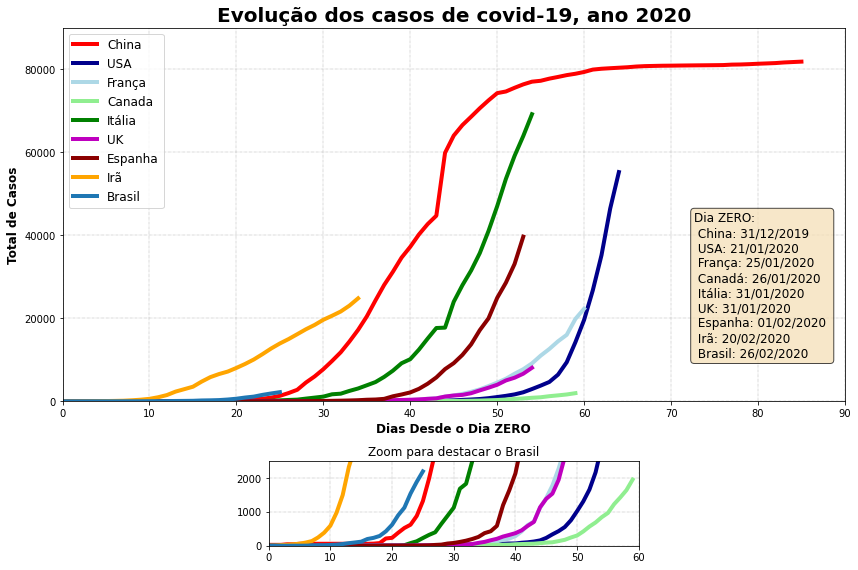

In [43]:
fig = plt.figure(figsize=(12,8))

#plotando o principal
ax1 = plt.subplot2grid((4,4), (0,0), colspan=4, rowspan=3)
ax1.axis([0, 90, -1, 90000])
ax1.plot(china_df.index, china_df['total_cases'], linewidth=4, color='red', 
         label='China')
ax1.plot(usa_df.index, usa_df['total_cases'], linewidth=4, color='darkblue', 
         label='USA')
ax1.plot(france_df.index, france_df['total_cases'], linewidth=4, 
         color='lightblue', label='França')
ax1.plot(canada_df.index, canada_df['total_cases'], linewidth=4, 
         color='lightgreen', label='Canada')
ax1.plot(italy_df.index, italy_df['total_cases'], linewidth=4, color='green', 
         label='Itália')
ax1.plot(uk_df.index, uk_df['total_cases'], linewidth=4, color='m', 
         label='UK')
ax1.plot(spain_df.index, spain_df['total_cases'], linewidth=4, color='darkred', 
         label='Espanha')
ax1.plot(iran_df.index, iran_df['total_cases'], linewidth=4, color='orange', 
         label='Irã')
ax1.plot(brazil_df.index, brazil_df['total_cases'], linewidth=4, label='Brasil')
ax1.grid(ls='-.', lw=0.45)
ax1.legend(fontsize=12)
ax1.set_title('Evolução dos casos de covid-19, ano 2020', fontsize=20, 
              weight='bold')
ax1.set_xlabel('Dias Desde o Dia ZERO', weight='bold', fontsize=12)
ax1.set_ylabel('Total de Casos', weight='bold', fontsize=12)

#zoom para destacar o Brasil
ax2 = plt.subplot2grid((4,4), (3,1), colspan=2, rowspan=1)
ax2.axis([0, 60, -1, 2500])
ax2.plot(china_df.index, china_df['total_cases'], linewidth=4, color='red', 
         label='China')
ax2.plot(usa_df.index, usa_df['total_cases'], linewidth=4, color='darkblue', 
         label='USA')
ax2.plot(france_df.index, france_df['total_cases'], linewidth=4, 
         color='lightblue', label='França')
ax2.plot(canada_df.index, canada_df['total_cases'], linewidth=4, 
         color='lightgreen', label='Canada')
ax2.plot(italy_df.index, italy_df['total_cases'], linewidth=4, color='green', 
         label='Itália')
ax2.plot(uk_df.index, uk_df['total_cases'], linewidth=4, color='m', 
         label='UK')
ax2.plot(spain_df.index, spain_df['total_cases'], linewidth=4, color='darkred', 
         label='Espanha')
ax2.plot(iran_df.index, iran_df['total_cases'], linewidth=4, color='orange', 
         label='Irã')
ax2.plot(brazil_df.index, brazil_df['total_cases'], linewidth=4, label='Brasil')
ax2.grid(ls='-.', lw=0.45)
ax2.set_title('Zoom para destacar o Brasil')

fig.tight_layout(pad=1.0)

#visao artistica
ax = plt.gca()
text_box = 'Dia ZERO: \n China: 31/12/2019 \n USA: 21/01/2020 '\
           '\n França: 25/01/2020 \n Canadá: 26/01/2020 \n Itália: 31/01/2020'\
           '\n UK: 31/01/2020 \n Espanha: 01/02/2020 \n Irã: 20/02/2020'\
           '\n Brasil: 26/02/2020'
prop = dict(boxstyle='round', facecolor='wheat', alpha=0.7)
ax.text(1.15, 2.2, text_box, transform=ax.transAxes, fontsize=12,
        verticalalignment='bottom', bbox=prop)

plt.show()

### Treinando o Modelo

In [38]:
model = LinearRegression()
orders = np.arange(0,10)
r2_train = np.zeros(10)
r2_test = np.zeros(10)

#X = china_df.index
#y = china_df['total_cases']
#X = brazil_df.index
#y = brazil_df['total_cases']
X = usa_df.index
y = usa_df['total_cases']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_tr = X_train.values.reshape(-1,1)
X_ts = X_test.values.reshape(-1,1)

for i in range(len(orders)):
  poly = PolynomialFeatures(degree=orders[i])

  X_tr_poly = poly.fit_transform(X_tr)
  X_ts_poly = poly.fit_transform(X_ts)
  
  model.fit(X_tr_poly, y_train)

  r2_train[i] = r2_score(y_train, model.predict(X_tr_poly))
  r2_test[i] = r2_score(y_test, model.predict(X_ts_poly))
  if i>0:
    if r2_train[i] > r2_train[i-1]:
      max_r2_train = r2_train[i]
      i_r2_train = i
    if r2_test[i] > r2_test[i-1]:
      max_r2_test = r2_test[i]
      i_r2_test = i

print(i_r2_train, max_r2_train, i_r2_test, max_r2_test)


9 0.9988660071305004 9 0.9963969860333457


#### Plotando

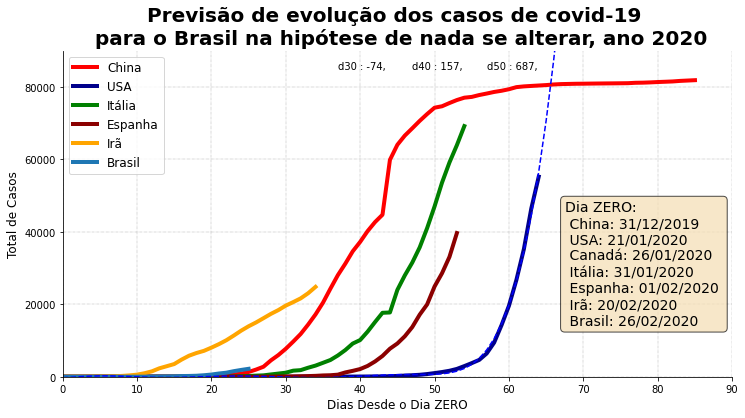

In [41]:
plt.figure(figsize=(12,6))

plt.plot(china_df.index, china_df['total_cases'], linewidth=4, color='red', label='China')
plt.plot(usa_df.index, usa_df['total_cases'], linewidth=4, color='darkblue', label='USA')
plt.plot(italy_df.index, italy_df['total_cases'], linewidth=4, color='green', label='Itália')
plt.plot(spain_df.index, spain_df['total_cases'], linewidth=4, color='darkred', label='Espanha')
plt.plot(iran_df.index, iran_df['total_cases'], linewidth=4, color='orange', label='Irã')
plt.plot(brazil_df.index, brazil_df['total_cases'], linewidth=4, label='Brasil')

#fazendo a previsao conforme o modelo de acao do Brasil
def plot_model(local, ordem, cor):
  X = local.index
  y = local['total_cases']
  X_predict = np.arange(0,80).reshape(-1,1)
  poly = PolynomialFeatures(degree=orders[ordem])
  X1 = X.values.reshape(-1,1)
  X_poly = poly.fit_transform(X1)
  model.fit(X_poly, y)

  plt.plot(X_predict, model.predict(poly.fit_transform(X_predict)), '--', color=cor)
  for i in np.arange(30.0,60.0,10.0):
    day = model.predict(poly.fit_transform([[i]]))
    plt.text(7+i, 85000, 'd%1.0f : %1.0f,'%(i, day))

#plot_model(brazil_df, 3, 'black')
#plot_model(china_df, 7, 'red')
plot_model(usa_df, 9, 'blue')

#formatando o grafico
plt.legend(fontsize=12)
plt.title('Previsão de evolução dos casos de covid-19 \n para o Brasil na '\
          'hipótese de nada se alterar, ano 2020', fontsize=20, weight='bold')
plt.ylabel('Total de Casos', fontsize=12)
plt.xlabel('Dias Desde o Dia ZERO', fontsize=12)
plt.xticks(fontsize=10)

#visao artistica
ax = plt.gca()
ax.axis([0, 90, -1,90000])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(ls='-.', lw=0.45)

text_box = 'Dia ZERO: \n China: 31/12/2019 \n USA: 21/01/2020'\
           '\n Canadá: 26/01/2020 \n Itália: 31/01/2020 \n Espanha: 01/02/2020'\
           ' \n Irã: 20/02/2020 \n Brasil: 26/02/2020'
prop = dict(boxstyle='round', facecolor='wheat', alpha=0.7)
ax.text(0.75, 0.15, text_box, transform=ax.transAxes, fontsize=14,
        verticalalignment='bottom', bbox=prop)

plt.show()

## Verificando o número de *mortes*


*usando um gráfico*

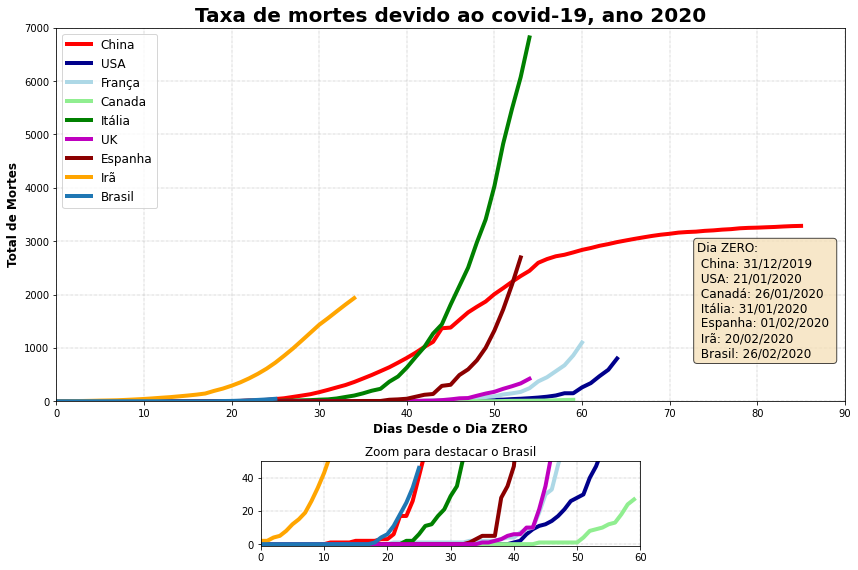

In [48]:
fig = plt.figure(figsize=(12,8))

#plotando o principal
ax1 = plt.subplot2grid((4,4), (0,0), colspan=4, rowspan=3)
ax1.axis([0, 90, -1, 7000])
ax1.plot(china_df.index, china_df['total_deaths'], linewidth=4, color='red', 
         label='China')
ax1.plot(usa_df.index, usa_df['total_deaths'], linewidth=4, color='darkblue', 
         label='USA')
ax1.plot(france_df.index, france_df['total_deaths'], linewidth=4, 
         color='lightblue', label='França')
ax1.plot(canada_df.index, canada_df['total_deaths'], linewidth=4, 
         color='lightgreen', label='Canada')
ax1.plot(italy_df.index, italy_df['total_deaths'], linewidth=4, color='green', 
         label='Itália')
ax1.plot(uk_df.index, uk_df['total_deaths'], linewidth=4, color='m', 
         label='UK')
ax1.plot(spain_df.index, spain_df['total_deaths'], linewidth=4, color='darkred', 
         label='Espanha')
ax1.plot(iran_df.index, iran_df['total_deaths'], linewidth=4, color='orange', 
         label='Irã')
ax1.plot(brazil_df.index, brazil_df['total_deaths'], linewidth=4, label='Brasil')
ax1.grid(ls='-.', lw=0.45)
ax1.legend(fontsize=12, loc=2)
ax1.set_title('Taxa de mortes devido ao covid-19, ano 2020', fontsize=20, 
              weight='bold')
ax1.set_xlabel('Dias Desde o Dia ZERO', weight='bold', fontsize=12)
ax1.set_ylabel('Total de Mortes', weight='bold', fontsize=12)

#zoom para destacar o Brasil
ax2 = plt.subplot2grid((4,4), (3,1), colspan=2, rowspan=1)
ax2.axis([0, 60, -1, 50])
ax2.plot(china_df.index, china_df['total_deaths'], linewidth=4, color='red', 
         label='China')
ax2.plot(usa_df.index, usa_df['total_deaths'], linewidth=4, color='darkblue', 
         label='USA')
ax2.plot(france_df.index, france_df['total_deaths'], linewidth=4, 
         color='lightblue', label='França')
ax2.plot(canada_df.index, canada_df['total_deaths'], linewidth=4, 
         color='lightgreen', label='Canada')
ax2.plot(italy_df.index, italy_df['total_deaths'], linewidth=4, color='green', 
         label='Itália')
ax2.plot(spain_df.index, spain_df['total_deaths'], linewidth=4, color='darkred', 
         label='Espanha')
ax2.plot(uk_df.index, uk_df['total_deaths'], linewidth=4, color='m', 
         label='UK')
ax2.plot(iran_df.index, iran_df['total_deaths'], linewidth=4, color='orange', 
         label='Irã')
ax2.plot(brazil_df.index, brazil_df['total_deaths'], linewidth=4, label='Brasil')
ax2.grid(ls='-.', lw=0.45)
ax2.set_title('Zoom para destacar o Brasil')

fig.tight_layout(pad=1.0)

#visao artistica
ax = plt.gca()
text_box = 'Dia ZERO: \n China: 31/12/2019 \n USA: 21/01/2020'\
           '\n Canadá: 26/01/2020 \n Itália: 31/01/2020 \n Espanha: 01/02/2020'\
           ' \n Irã: 20/02/2020 \n Brasil: 26/02/2020'
prop = dict(boxstyle='round', facecolor='wheat', alpha=0.7)
ax.text(1.15, 2.2, text_box, transform=ax.transAxes, fontsize=12,
        verticalalignment='bottom', bbox=prop)


plt.show()

*usando uma regressão polinomial*

In [0]:
model = LinearRegression()
orders = np.arange(0,10)
r2_train = np.zeros(10)
r2_test = np.zeros(10)

#X = china_df.index
#y = china_df['total_cases']
X = brazil_df.index
y = brazil_df['total_deaths']
#X = usa_df.index
#y = usa_df['total_cases']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_tr = X_train.values.reshape(-1,1)
X_ts = X_test.values.reshape(-1,1)

for i in range(len(orders)):
  poly = PolynomialFeatures(degree=orders[i])

  X_tr_poly = poly.fit_transform(X_tr)
  X_ts_poly = poly.fit_transform(X_ts)
  
  model.fit(X_tr_poly, y_train)

  r2_train[i] = r2_score(y_train, model.predict(X_tr_poly))
  r2_test[i] = r2_score(y_test, model.predict(X_ts_poly))
  if i>0:
    if r2_train[i] > r2_train[i-1]:
      max_r2_train = r2_train[i]
      i_r2_train = i
    if r2_test[i] > r2_test[i-1]:
      max_r2_test = r2_test[i]
      i_r2_test = i

print(i_r2_train, max_r2_train, i_r2_test, max_r2_test)


### Plotando os resultados

In [0]:
plt.figure(figsize=(12,6))

plt.plot(china_df.index, china_df['total_deaths'], linewidth=4, color='red', label='China')
plt.plot(usa_df.index, usa_df['total_deaths'], linewidth=4, color='darkblue', label='USA')
plt.plot(italy_df.index, italy_df['total_deaths'], linewidth=4, color='green', label='Itália')
plt.plot(spain_df.index, spain_df['total_deaths'], linewidth=4, color='darkred', label='Espanha')
plt.plot(iran_df.index, iran_df['total_deaths'], linewidth=4, color='orange', label='Irã')
plt.plot(brazil_df.index, brazil_df['total_deaths'], linewidth=4, label='Brasil')

#fazendo a previsao conforme o modelo de acao do Brasil
def plot_model(local, ordem, cor):
  X = local.index
  y = local['total_deaths']
  X_predict = np.arange(0,80).reshape(-1,1)
  poly = PolynomialFeatures(degree=orders[ordem])
  X1 = X.values.reshape(-1,1)
  X_poly = poly.fit_transform(X1)
  model.fit(X_poly, y)

  plt.plot(X_predict, model.predict(poly.fit_transform(X_predict)), '--', color=cor)
  for i in np.arange(30.0,150.0,20.0):
    day = model.predict(poly.fit_transform([[i]]))
    plt.text(12+(i/2), 4800, 'd%1.0f : %1.0f, '%(i, day))
    
plot_model(brazil_df, 5, 'black')
#plot_model(china_df, 7, 'red')
#plot_model(usa_df, 9, 'blue')

#formatando o grafico
plt.legend(fontsize=12)
plt.title('Previsão de evolução de mortes por covid-19 \n para o Brasil na '\
          'hipótese de nada se alterar, ano 2020', fontsize=20, weight='bold')
plt.ylabel('Total de Mortes', fontsize=12)
plt.xlabel('Dias Desde o Dia ZERO', fontsize=12)
plt.xticks(fontsize=10)

#visao artistica
ax = plt.gca()
ax.axis([0, 90, -1, 5000])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(ls='-.', lw=0.45)

plt.arrow(85, 4800, -4, -310, width=0.2, head_width=1, head_length=100, color='black')
plt.text(75, 4200, '05/07/2020')

text_box = 'Dia ZERO: \n China: 31/12/2019 \n USA: 21/01/2020'\
           '\n Itália: 31/01/2020 \n Espanha: 01/02/2020 \n Irã: 20/02/2020 \n'\
           'Brasil: 26/02/2020'

props = dict(boxstyle='round', facecolor='wheat', alpha=0.7)

ax.text(0.75, 0.15, text_box, transform=ax.transAxes, fontsize=14,
        verticalalignment='bottom', bbox=props)

plt.show()

*calculando qual será o dia D130 para o Brasil

In [0]:
d = date(2020, 2, 26)
d = d + timedelta(days = 130)
d

datetime.date(2020, 7, 5)

## Novos Casos

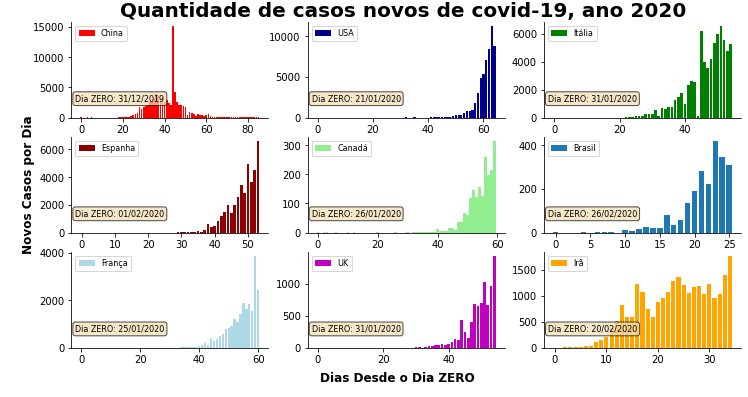

In [58]:
fig = plt.figure(figsize=(12,6))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.7)

# CHINA
ax = fig.add_subplot(331)
ax.bar(china_df.index, china_df['new_cases'], width=0.8, color='red', label='China')
ax.legend(fontsize=8, loc=2)
ax.text(0.02, 0.15, 'Dia ZERO: 31/12/2019', transform=ax.transAxes, fontsize=8,
        verticalalignment='bottom', bbox=props)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# USA
ax = fig.add_subplot(332)
ax.bar(usa_df.index, usa_df['new_cases'], width=0.8, color='darkblue', 
        label='USA')
ax.legend(fontsize=8, loc=2)
ax.text(0.02, 0.15, 'Dia ZERO: 21/01/2020', transform=ax.transAxes, fontsize=8,
        verticalalignment='bottom', bbox=props)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#ITÁLIA
ax = fig.add_subplot(333)
ax.bar(italy_df.index, italy_df['new_cases'], width=0.8, color='green', 
       label='Itália')
ax.legend(fontsize=8, loc=2)
ax.text(0.02, 0.15, 'Dia ZERO: 31/01/2020', transform=ax.transAxes, fontsize=8,
        verticalalignment='bottom', bbox=props)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#ESPANHA
ax = fig.add_subplot(334)
ax.bar(spain_df.index, spain_df['new_cases'], width=0.8, color='darkred', 
        label='Espanha')
ax.legend(fontsize=8, loc=2)
ax.text(0.02, 0.15, 'Dia ZERO: 01/02/2020', transform=ax.transAxes, fontsize=8,
        verticalalignment='bottom', bbox=props)
ax.set_ylabel('\nNovos Casos por Dia', weight='bold', fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#CANADÁ
ax = fig.add_subplot(335)
#ax.bar(iran_df.index, iran_df['new_cases'], width=0.8, color='orange', 
#       label='Irã')
ax.bar(canada_df.index, canada_df['new_cases'], width=0.8, color='lightgreen', 
       label='Canadá')
ax.legend(fontsize=8, loc=2)
#ax.text(0.02, 0.15, 'Dia ZERO: 20/02/2020', transform=ax.transAxes, fontsize=8,
#        verticalalignment='bottom', bbox=props)
ax.text(0.02, 0.15, 'Dia ZERO: 26/01/2020', transform=ax.transAxes, fontsize=8,
        verticalalignment='bottom', bbox=props)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#BRASIL
ax = fig.add_subplot(336)
ax.bar(brazil_df.index, brazil_df['new_cases'], width=0.8, label='Brasil')
ax.legend(fontsize=8, loc=2)
ax.text(0.02, 0.15, 'Dia ZERO: 26/02/2020', transform=ax.transAxes, fontsize=8,
        verticalalignment='bottom', bbox=props)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#FRANÇA
ax = fig.add_subplot(337)
ax.bar(france_df.index, france_df['new_cases'], width=0.8, color='lightblue',
       label='França')
ax.legend(fontsize=8, loc=2)
ax.text(0.02, 0.15, 'Dia ZERO: 25/01/2020', transform=ax.transAxes, fontsize=8,
        verticalalignment='bottom', bbox=props)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#REINO UNIDO
ax = fig.add_subplot(338)
ax.bar(uk_df.index, uk_df['new_cases'], width=0.8, color='m',
       label='UK')
ax.legend(fontsize=8, loc=2)
ax.text(0.02, 0.15, 'Dia ZERO: 31/01/2020', transform=ax.transAxes, fontsize=8,
        verticalalignment='bottom', bbox=props)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#IRÃ
ax = fig.add_subplot(339)
ax.bar(iran_df.index, iran_df['new_cases'], width=0.8, color='orange',
       label='Irã')
ax.legend(fontsize=8, loc=2)
ax.text(0.02, 0.15, 'Dia ZERO: 20/02/2020', transform=ax.transAxes, fontsize=8,
        verticalalignment='bottom', bbox=props)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#visao artistica
ax = plt.gca()
#ax.grid(ls='-.', lw=0.45)
ax.annotate('Dias Desde o Dia ZERO', xy=(320, 15), xycoords='figure pixels', 
            weight='bold', fontsize=12)
ax.annotate('Quantidade de casos novos de covid-19, ano 2020', xy=(120, 380), 
            xycoords='figure pixels', fontsize=20, weight='bold')


plt.show()